# Prepping Stroke Data

In [2]:
train=pd.read_csv("healthcare-dataset-stroke-data.csv")
train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


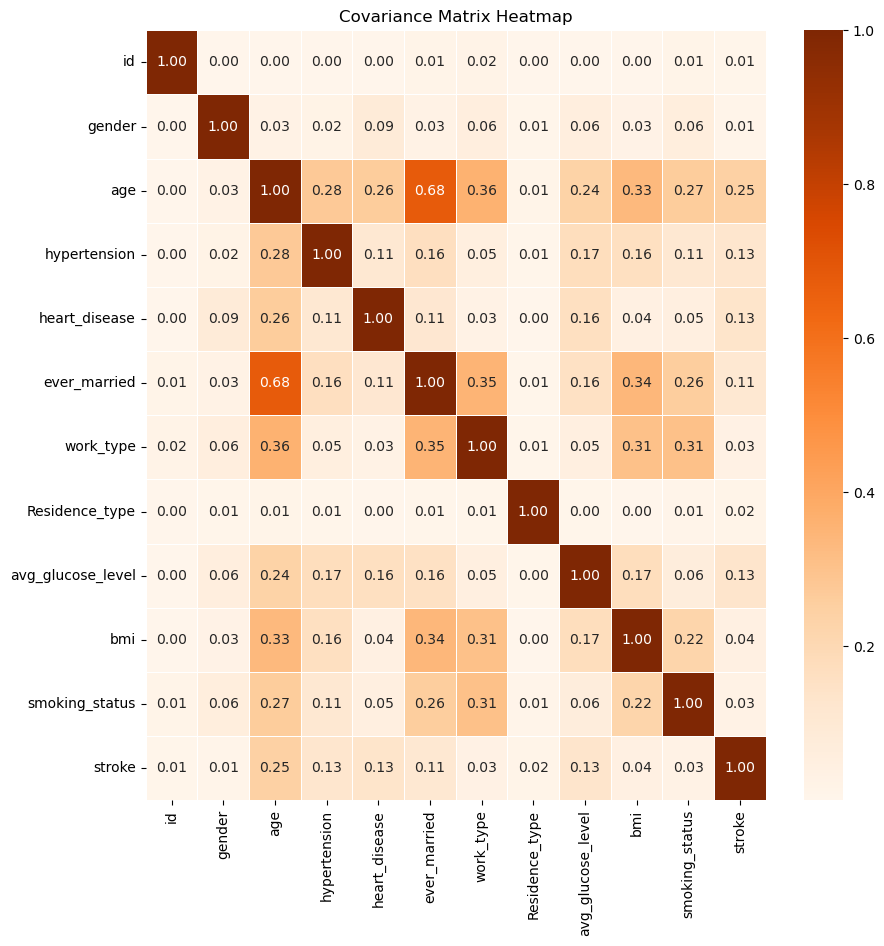

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
scaler= StandardScaler()
df = train.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
trainup = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
cov_matrix = abs(trainup.cov())
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, annot=True, cmap='Oranges', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [4]:
df=df.drop([ 'id', 'gender' ], axis=1)
X_train=df.drop(['stroke'], axis=1)
Y_train=df['stroke']
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [5]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.2, loss_function='Logloss', eval_metric='Accuracy', random_seed=42, metric_period=100) 
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')
accuracy = cv_results
average_accuracy = cv_results.mean()

print("Accuracy for each fold:", accuracy)
print("Average Accuracy across all folds:", average_accuracy)

0:	learn: 0.9558977	total: 150ms	remaining: 14.9s
99:	learn: 0.9605950	total: 328ms	remaining: 0us
0:	learn: 0.9478079	total: 3.28ms	remaining: 325ms
99:	learn: 0.9538100	total: 170ms	remaining: 0us
0:	learn: 0.9493869	total: 2.21ms	remaining: 219ms
99:	learn: 0.9572137	total: 172ms	remaining: 0us
0:	learn: 0.9519958	total: 1.53ms	remaining: 152ms
99:	learn: 0.9606053	total: 164ms	remaining: 0us
Accuracy for each fold: [0.94053208 0.96322379 0.95536413 0.94909945]
Average Accuracy across all folds: 0.9520548637688832


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [8]:
df.drop(['id'], axis = 1, inplace = True)

In [9]:
df.dropna(axis = 0, inplace = True)


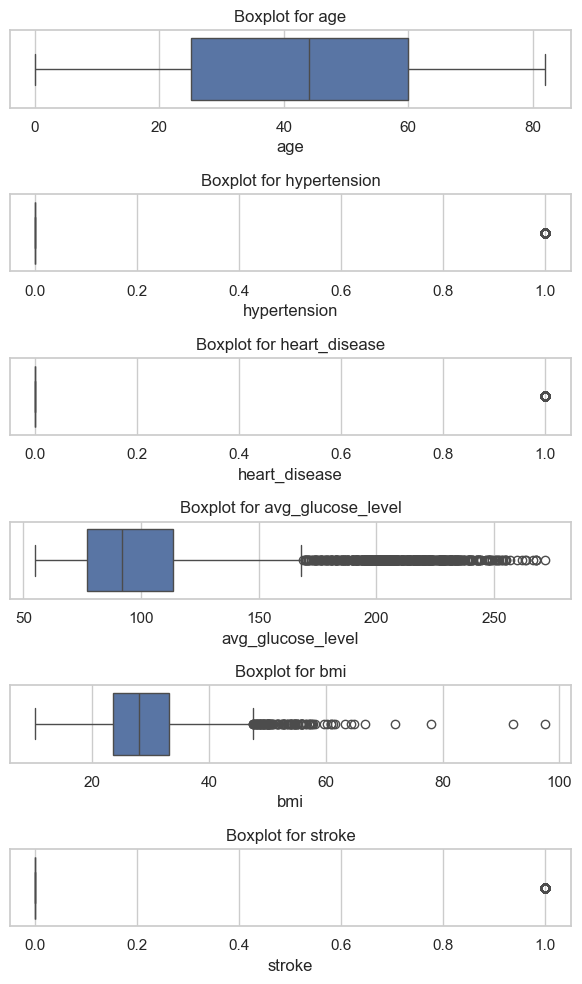

In [10]:
num_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(6, 10))

sns.set(style="whitegrid")

for i, column in enumerate(num_columns):
    plt.subplot(len(num_columns), 1, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [11]:
df['hypertension'].replace({0: 'have hypertension', 1: 'does not have hypertension'}, inplace=True)
df['heart_disease'].replace({0: 'have heart disease', 1: 'does not have heart disease'}, inplace=True)

In [12]:
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

In [13]:
x = df.drop(['stroke'], axis = 1)

In [14]:
y = df['stroke']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3927, 10)
(982, 10)
(3927,)
(982,)


In [17]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
rs = RandomizedSearchCV(
    estimator = SVC(gamma='auto'),
    param_distributions={
        'C': [1, 10, 20],
        'kernel': ['rbf', 'linear']
    },
    cv=5,
    return_train_score=False,
    n_iter=4
)

rs.fit(x_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=4,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [19]:
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,linear,0.960275
1,10,rbf,0.956200
2,1,rbf,0.960275
3,20,rbf,0.952127


In [20]:
svm_model = svm.SVC(C=20, kernel= 'linear',)
svm_model.fit(x_train, y_train)


SVC(C=20, kernel='linear')

In [21]:
y_pred_test = svm_model.predict(x_test_scaled)

svm_accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {round(svm_accuracy_test * 100,2)}%")

y_pred_train = svm_model.predict(x_train_scaled)

svm_accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {round(svm_accuracy_train * 100,2)}%")

Test Accuracy: 94.6%
Train Accuracy: 96.03%


C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\whitl\OneDriveDesktopNew_Folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


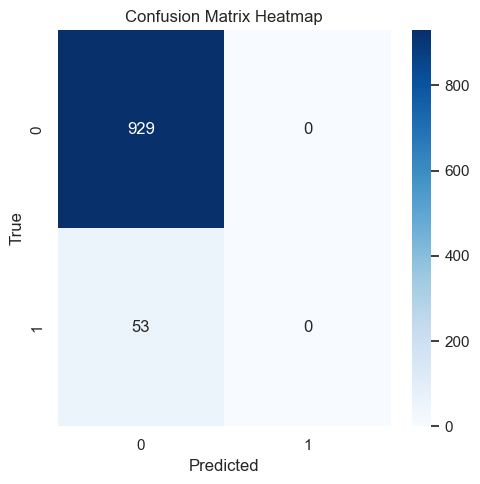

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

plt.tight_layout()
plt.show()

### Main Project

In [72]:
pip install imblearn

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from stroke_pipeline import train_test_split_stroke,\
    fill_missing,\
    build_encoders,\
    encode_categorical,\
    build_target_encoder,\
    encode_target

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
#Lets go ahead and loop through all of our columns and see what data they reveal

def describe_df(df: pd.DataFrame):
    print(f"The dataset contains {df.shape[1]} columns and {len(df)} rows")
    for col in df.columns:
        col_dtype = df[col].dtype
        print(f"\nColumn: {col} ({col_dtype})")
        if col_dtype == 'object':
            print(f"--- Percentage of NaNs: {df[col].isna().sum() / len(df[col]) * 100}")
            print(f"--- Unique values:\n {df[col].unique()}")
        else:
            print(f"--- Summary statistics:\n {df[col].describe()}")
describe_df(df)

The dataset contains 12 columns and 5110 rows

Column: id (int64)
--- Summary statistics:
 count     5110.000000
mean     36517.829354
std      21161.721625
min         67.000000
25%      17741.250000
50%      36932.000000
75%      54682.000000
max      72940.000000
Name: id, dtype: float64

Column: gender (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['Male' 'Female' 'Other']

Column: age (float64)
--- Summary statistics:
 count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

Column: hypertension (int64)
--- Summary statistics:
 count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

Column: heart_disease (int64)
--- Summary statistics:
 count    5110.000000
mean        0.054012
std        

In [68]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [24]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [25]:
df = df.drop('id', axis=1)

In [26]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
df = df.dropna()

In [28]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [29]:
# Define categorical features for encoding
catFeatures = ['gender','ever_married','work_type','Residence_type','smoking_status']
# Describe the categorical features to see the number of unique categories in each
df[catFeatures].describe(include='all').loc['unique', :]

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
Name: unique, dtype: object

In [30]:
# Convert categorical columns to 'category' dtype for efficient encoding
df[['gender','ever_married','work_type','Residence_type','smoking_status']] = df[['gender','ever_married','work_type','Residence_type','smoking_status']].astype('category')
df.dtypes

gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [31]:
# Encode categorical features as integers
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[column] = df[column].astype('category').cat.codes

In [32]:
# Print the unique values in the encoded categorical columns for verification
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'gender': [1 0 2]
Unique values in 'ever_married': [1 0]
Unique values in 'work_type': [2 3 0 4 1]
Unique values in 'Residence_type': [1 0]
Unique values in 'smoking_status': [1 2 3 0]


In [33]:
# Check the distribution of values in the 'gender' column
df['gender'].value_counts() # We'll treat it as a binary!

gender
0    2897
1    2011
2       1
Name: count, dtype: int64

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [68]:
oversample = SMOTE()
eval_df = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(df.shape[0]*0.2),random_state=42)
train_df = df.drop(index=eval_df.index)

X_test,y_test = eval_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], eval_df['stroke']
X_train,y_train = train_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_df['stroke']


X_train, y_train = oversample.fit_resample(X_train,y_train)
usampled_df = X.assign(Stroke = y)

X_test,y_test = oversample.fit_resample(X_test,y_test)
usampled_eval_df = X_eval.assign(Stroke = y_test)

In [35]:
# oversample = SMOTE()
# eval_df = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','stroke']].sample(int(df.shape[0]*0.2),random_state=42)
# train_df = df.drop(index=eval_df.index)

# X_eval,y_eval = eval_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], eval_df['stroke']
# X,y = train_df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']], train_df['stroke']


# X, y = oversample.fit_resample(X,y)
# usampled_df = X.assign(Stroke = y)

# X_eval,y_eval = oversample.fit_resample(X_eval,y_eval)
# usampled_eval_df = X_eval.assign(Stroke = y_eval)

In [65]:
X_upsampled

SMOTE(random_state=42)

In [63]:
from imblearn.over_sampling import SMOTE
smote_instance = SMOTE(random_state=42)
X_upsampled = smote_instance.fit(X_train, y_train)

# df_upsampled = pd.concat([X_train, X_upsampled], ignore_index=True)

In [38]:
X_eval

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
0,1,80.000000,0,1,2,125.320000,32.900000
1,0,42.000000,0,0,2,84.030000,31.400000
2,1,66.000000,1,0,2,74.900000,32.100000
3,1,29.000000,0,0,0,102.400000,26.900000
4,1,47.000000,0,0,2,88.490000,22.200000
...,...,...,...,...,...,...,...
1851,0,79.000000,0,0,0,97.534986,22.485418
1852,0,68.895796,0,0,2,196.879553,29.446247
1853,0,80.693201,1,0,2,74.040794,24.935231
1854,0,65.683119,0,0,1,200.824473,35.984108


In [49]:
y_eval

0       0
1       0
2       0
3       0
4       0
       ..
1851    1
1852    1
1853    1
1854    1
1855    1
Name: stroke, Length: 1856, dtype: int64

In [39]:
eval_df.head(5)

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke
4336,1,80.0,0,1,2,125.32,32.9,0
3709,0,42.0,0,0,2,84.03,31.4,0
964,1,66.0,1,0,2,74.90,32.1,0
2647,1,29.0,0,0,0,102.40,26.9,0
3262,1,47.0,0,0,2,88.49,22.2,0


In [70]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns that need normalization
numerical_cols = ['age', 'avg_glucose_level', 'work_type', 'bmi']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit on training data
scaler.fit(X_train[numerical_cols])

# Transform both training and testing data
X[numerical_cols] = scaler.transform(X[numerical_cols])
X_eval[numerical_cols] = scaler.transform(X_eval[numerical_cols])

In [18]:
# Run train test split
X = df.drop(['stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

## Choose scaling method

 Normalization (also known as Min-Max scaling) rescales the features to a fixed range, usually 0 to 1. 

Advantages:

 - Useful when you need to bound your values between a specific range.
 - Maintains the original distribution without distorting differences in the ranges of values.

Disadvantages:

 - If your data contains outliers, normalization can squash the "normal" data into a small portion of the range, reducing the      algorithm's ability to learn from it.

Standardization (also known as Z-score normalization) rescales data so that it has a mean of 0 and a standard deviation of 1.

Advantages:

 - Standardization does not bound values to a specific range, which might be useful for certain algorithms that assume no specific range.
 - More robust to outliers compared to normalization.

Disadvantages:

 - The resulting distribution will have a mean of 0 and a standard deviation of 1, but it might not be suitable for algorithms that expect input data to be within a bounded range.

### Normalization

In [69]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns that need normalization
numerical_cols = ['age', 'avg_glucose_level', 'work_type', 'bmi', 'smoking_status']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit on training data
scaler.fit(X_train[numerical_cols])

# Transform both training and testing data
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

KeyError: "['smoking_status'] not in index"

### Standardization

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Selecting numerical columns that need normalization
# numerical_cols = ['age', 'avg_glucose_level', 'work_type', 'bmi', 'smoking_status']

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit on training data
# scaler.fit(X_train[numerical_cols])

# # Transform both training and testing data
# X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [41]:
# Verify processing worked
X_train.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2984,1,0.145508,0,0,0,1.00,1,0.265002,0.243337,0.666667
714,0,0.414062,0,0,0,0.50,0,0.477097,0.198146,0.000000
367,0,0.694824,0,0,0,0.75,0,0.081970,0.112399,0.666667


In [42]:
# Verify processing worked
X_test.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1774,0,0.145508,0,0,0,1.00,0,0.124812,0.141367,0.333333
1490,0,0.597168,1,0,1,0.00,0,0.248260,0.158749,0.000000
3523,0,0.621582,0,0,1,0.75,0,0.198128,0.118192,0.666667


In [43]:
display(X_train.shape)
display(X_train.info())
display(X_train.describe())
display(X_train.columns)

(3436, 10)

<class 'pandas.core.frame.DataFrame'>
Index: 3436 entries, 2984 to 4646
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3436 non-null   int8   
 1   age                3436 non-null   float64
 2   hypertension       3436 non-null   int64  
 3   heart_disease      3436 non-null   int64  
 4   ever_married       3436 non-null   int8   
 5   work_type          3436 non-null   float64
 6   Residence_type     3436 non-null   int8   
 7   avg_glucose_level  3436 non-null   float64
 8   bmi                3436 non-null   float64
 9   smoking_status     3436 non-null   float64
dtypes: float64(5), int64(2), int8(3)
memory usage: 224.8 KB


None

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000,3436.000000
mean,0.414435,0.522655,0.092258,0.048021,0.651921,0.541254,0.506985,0.238060,0.204064,0.459158
std,0.493287,0.274988,0.289433,0.213842,0.476431,0.273975,0.500024,0.210666,0.091509,0.354971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.500000,0.000000,0.104954,0.142526,0.000000
50%,0.000000,0.536133,0.000000,0.000000,1.000000,0.500000,1.000000,0.171957,0.195829,0.666667
75%,1.000000,0.731445,0.000000,0.000000,1.000000,0.750000,1.000000,0.278158,0.251448,0.666667
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

### PCA

In [72]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 7)
pca_model.fit(X_train)

X_train_pca = pd.DataFrame(pca_model.transform(X_train))
X_test_pca = pd.DataFrame(pca_model.transform(X_test))
X_train_pca

,0,1,2,3,4,5,6
0,108.476706,3.701630,3.565816,-0.309555,0.709300,-0.216572,0.847569
1,-11.105775,-27.230771,2.362741,-0.521241,0.774945,-0.189037,0.898341
2,48.950154,13.030926,3.732718,-0.036415,-0.353566,-0.112208,-0.048211
3,55.873735,-15.785656,-8.006726,-1.253303,-0.315702,0.827379,-0.081551
4,68.289723,-16.161215,-3.419287,-0.368981,0.687128,-0.189396,-0.146300
...,...,...,...,...,...,...,...
7539,-21.738725,-19.445918,-3.956635,-0.217710,-0.299379,-0.100079,-0.035588
7540,-43.896771,-25.970713,0.471934,-0.373021,-0.277813,-0.116080,-0.025208
7541,13.984056,-18.077797,-4.565599,0.748862,-0.285094,-0.087141,-0.053833
7542,-28.799376,-31.248965,0.785689,-0.487429,-0.268220,-0.141605,-0.041067


### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_pca, y_train)

RandomForestClassifier()

In [74]:
y_test_pred = model.predict(X_test_pca)
print(balanced_accuracy_score(y_test, y_test_pred))

0.650323275862069


In [75]:
y_train_pred = model.predict(X_train_pca)
print(balanced_accuracy_score(y_train, y_train_pred))

1.0


In [76]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=100, max_depth=depth)
    model.fit(X_train_pca, y_train)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

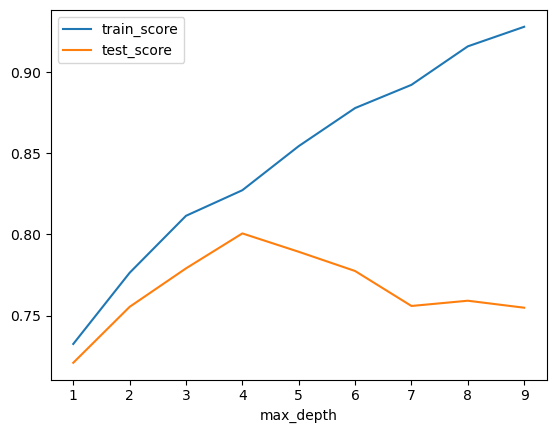

In [77]:
models_df.plot(x='max_depth')

In [79]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
model.fit(X_train, y_train)
forest_score = model.score(X_train, y_train)
forest_test = model.score(X_test, y_test)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
y_pred = model.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

Training Score 0.8242311770943797
Testing Score 
 0.8189655172413793
0.8189655172413793


In [82]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       928
           1       0.77      0.90      0.83       928

    accuracy                           0.82      1856
   macro avg       0.83      0.82      0.82      1856
weighted avg       0.83      0.82      0.82      1856



In [81]:
models = {'train_score': [], 'test_score': [], 'n_estimators': []}

for n in [50, 100, 500, 1000]:
    models['n_estimators'].append(n)
    model = RandomForestClassifier(n_estimators=n, max_depth=7)
    model.fit(X_train_pca, y_train)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='n_estimators'>

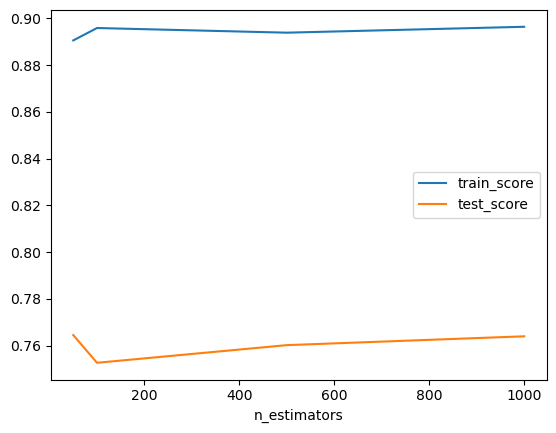

In [83]:
models_df.plot(x='n_estimators')

### K Neighbors

In [84]:
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100, 500]
}
random_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)

random_knn.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END leaf_size=500, n_neighbors=11, weights=distance;, score=0.893 total time=   0.0s
[CV 2/5] END leaf_size=500, n_neighbors=11, weights=distance;, score=0.894 total time=   0.0s
[CV 3/5] END leaf_size=500, n_neighbors=11, weights=distance;, score=0.883 total time=   0.0s
[CV 4/5] END leaf_size=500, n_neighbors=11, weights=distance;, score=0.881 total time=   0.0s
[CV 5/5] END leaf_size=500, n_neighbors=11, weights=distance;, score=0.885 total time=   0.0s
[CV 1/5] END leaf_size=100, n_neighbors=9, weights=uniform;, score=0.885 total time=   0.0s
[CV 2/5] END leaf_size=100, n_neighbors=9, weights=uniform;, score=0.888 total time=   0.0s
[CV 3/5] END leaf_size=100, n_neighbors=9, weights=uniform;, score=0.875 total time=   0.0s
[CV 4/5] END leaf_size=100, n_neighbors=9, weights=uniform;, score=0.876 total time=   0.0s
[CV 5/5] END leaf_size=100, n_neighbors=9, weights=uniform;, score=0.885 total time=   0.0s
[CV 1/5] 

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [10, 50, 100, 500],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [85]:
y_pred = random_knn.predict(X_test_pca)
print(balanced_accuracy_score(y_test, y_pred))

0.6023706896551724


In [86]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression()
classifier.fit(X, y)
classifier.score

<bound method ClassifierMixin.score of LogisticRegression()>

In [ ]:
import xgboost as xgb

In [ ]:
# !pip3 install xgboost

In [ ]:
# import sys
# !{sys.executable} -m pip install xgboost

In [ ]:
# xgc=XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)
# xgc.fit(X_train,y_train)
# predict=xgc.predict(x_test)
# print('Accuracy --> ',accuracy_score(predict,y_test))
# print('F1 Score --> ',f1_score(predict,y_test))
# print('Classification Report  --> \n',classification_report(predict,y_test))

### Confusion Matrix

### CAT BOOST

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.2, loss_function='Logloss', eval_metric='Accuracy', random_seed=42, metric_period=100) 
kf = KFold(n_splits=4, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
accuracy = cv_results
average_accuracy = cv_results.mean()

print("Accuracy for each fold:", accuracy)
print("Average Accuracy across all folds:", average_accuracy)